In [69]:
from PIL import Image
import numpy as np
from PIL import ImageChops, ImageOps
from PIL import ImageStat as stat
import matplotlib.pyplot as plt

Zad 1

In [70]:
im = Image.open("zeby.png").convert('L')

![obraz_pierwszy](zeby.png)

Zad 2

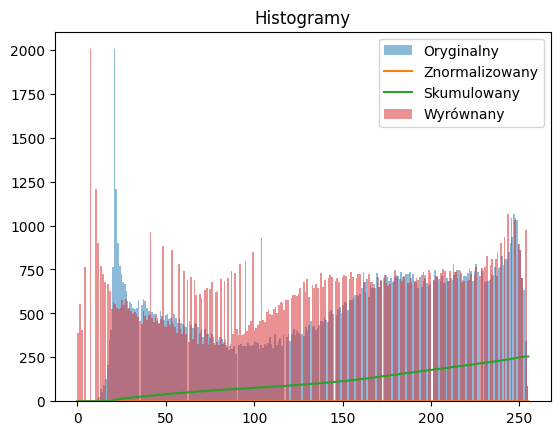

mean  [127.58241946922475]
stddev  [73.70704919848514]
mean  [147.37034078608488]
stddev  [73.08730813117347]


In [71]:
# Funkcja do obliczania histogramu znormalizowanego
def histogram_norm(image):
    hist = np.histogram(image, bins=256, range=(0, 256))[0]
    return hist / hist.sum()

# Funkcja do obliczania histogramu skumulowanego
def histogram_cumul(image):
    hist_norm = histogram_norm(image)
    return np.cumsum(hist_norm)

# Funkcja do wyrównania histogramu
def histogram_equalization(image):
    hist_cumul = histogram_cumul(image)
    equalized_array = np.floor(255 * hist_cumul[image]).astype('uint8')
    return Image.fromarray(equalized_array)

def image_stats(im):
    s = stat.Stat(im)
    print("mean ", s.mean)
    print("stddev ", s.stddev)

# Zadanie 2.1-2.3: Obliczanie histogramów i wyrównanie histogramu
hist_norm = histogram_norm(im)
hist_cumul = histogram_cumul(im)
obraz_equalized = histogram_equalization(np.array(im))
obraz_equalized.save("equalized.png")

# Rysowanie histogramów
plt.figure()
plt.title("Histogramy")
plt.hist(np.array(im).flatten(), bins=256, alpha=0.5, label="Oryginalny")
plt.plot(hist_norm, label="Znormalizowany")
plt.plot(hist_cumul * 255, label="Skumulowany")
plt.hist(np.array(obraz_equalized).flatten(), bins=256, alpha=0.5, label="Wyrównany")
plt.legend()

plt.savefig("fig1.png")
plt.show()

image_stats(obraz_equalized)
image_stats(im)


![obraz_drugi](equalized.png)

![obraz_trzeci](fig1.png)

Średnia

Obraz oryginalny: Średnia wynosi 147.37, co oznacza że wartości jasności w obrazie są bardziej przesunięte w stronę jaśniejszych tonów.

Obraz po wyrównaniu histogramu: Średnia spada do 127.58. Jest to wynik po rozłożeniu równomiernie wartości jasności na całym zakresie.

Po tym zabiegu obraz jest bardziej zbalansowany pod względem jasności

Odchylenie standardowe

Obraz oryginalny: Odchylenie standardowe wynosi 73.09 co oznacza w miarę umiarkowany kontrast.

Obraz po wyrównaniu histogramu: Odchylenie wzrosło do 73.71, co oznacza że piksele mają delikatnie zwiększony kontrast.

Zabieg ten poprawił widoczność szczegółów obrazu, szczególnie tam gdzie w oryginale wartości były skupione w wąskim zakresie.

Zad 3

/var/folders/6m/sxwr1x4s23xb75npsy_55lyw0000gn/T/ipykernel_11514/1796368754.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


mean  [127.22177596954201]
stddev  [73.72862419441894]


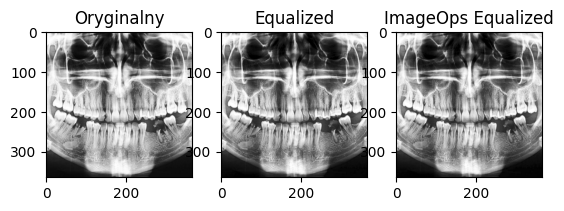

In [72]:
# Zadanie 3: Wyrównanie za pomocą ImageOps.equalize
obraz_equalized1 = ImageOps.equalize(im)
obraz_equalized1.save("equalized1.png")

# Rysowanie porównania obrazów
plt.figure()
plt.title("Porównanie obrazów")
plt.subplot(1, 3, 1)
plt.imshow(im, cmap='gray')
plt.title("Oryginalny")
plt.subplot(1, 3, 2)
plt.imshow(obraz_equalized, cmap='gray')
plt.title("Equalized")
plt.subplot(1, 3, 3)
plt.imshow(obraz_equalized1, cmap='gray')
plt.title("ImageOps Equalized")
plt.savefig("fig2.png")

image_stats(obraz_equalized1)


![obraz_czwarty](equalized1.png)

![obraz_piąty](fig2.png)

W zadaniu 2 średnia wyniosła 127.58, a w 3 127.22, odchylenie standardowe za to wyniosło w 2 zadaniu 73.71, a w 3 73.73.

Przez to że róźnice w wynikach są znikome można wnioskować, że obie metody są równie skuteczne, ale ImageOps.equalize jest prostszą i szybszą opcją w tym wypadku.

Zad 4

In [73]:
# Funkcja do konwersji obrazu RGB na L z wagami
def konwertuj1(image, w_r, w_g, w_b):
    array = np.array(image)
    L = np.round(array[:, :, 0] * w_r + array[:, :, 1] * w_g + array[:, :, 2] * w_b).astype('uint8')
    return Image.fromarray(L, mode='L')

def konwertuj2(image, w_r, w_g, w_b):
    array = np.array(image)
    L = (array[:, :, 0] * w_r + array[:, :, 1] * w_g + array[:, :, 2] * w_b).astype('uint8')
    return Image.fromarray(L, mode='L')

# Zadanie 4: Konwersja RGB na L
mgla = Image.open("mgla.jpg")
mgla_L1 = konwertuj1(mgla, 0.299, 0.587, 0.114)
mgla_L1.save("mgla_L1.png")
mgla_L = mgla.convert('L')
mgla_L.save("mgla_L.png")
mgla_L2 = konwertuj2(mgla, 0.299, 0.587, 0.114)
mgla_L2.save("mgla_L2.png")

# Statystyki obrazów
print("Statystyki obrazów:")
print("mgla_L:")
image_stats(mgla_L)
print("mgla_L1:")
image_stats(mgla_L1)
print("mgla_L2:")
image_stats(mgla_L2)

Statystyki obrazów:
mgla_L:
mean  [101.26246929467801]
stddev  [61.467605149419654]
mgla_L1:
mean  [101.26247131809298]
stddev  [61.46760838324146]
mgla_L2:
mean  [100.79557236338914]
stddev  [61.3762654022794]


4.2 mgla_L i mgla_L1 mają korzystają z takich samych wag do konwersji, ale mgla_L1 korzysta z zaokrąglenia, stąd się biorą te minimalne różnice.

4.3 mgla_L2 różni się mocniej od mgla_L i mgla_L1 dlatego, że int() ucina wartości, a w mgla_L i mgla_L1 wartości są bardziej zbliżone do rzeczywistych. Różnice te są jednak bardzo ciężkie do zauważenia.

![obraz_szósty](mgla_L.png)

![obraz_siódmy](mgla_L1.png)

![obraz_ósmy](mgla_L2.png)

![obraz_dziewiąty](mgla.jpg)